# Setup the data for analysis

In [71]:
import os
os.getcwd()

'/Users/sathvikb/Desktop/Projects/CSE291 Big Data'

In [72]:
import pandas as pd
df = pd.read_csv('Big-Data-Science-Drug-Protein-Interactions/peptide-variant_expression_table.tsv', sep='\t')


## Dropping unmodified columns
unmod_cols = [col for col in df.columns if '_unmod' in col]
df = df.drop(columns=unmod_cols)

columns_to_not_consider = ['rowid', 'ccms_row_id', 'Variant', 'Variant ID', 'Unmod variant', 'Total', 'Proteins', 'Mass', 'Charge', 'Num Mods', 'All Mods', 'Is Decoy', 'Lorikeet input', 'Orig cluster FDR', 'Pep Prefix', 'Variant FDR', 'Peptidoform', 'Canonical proteins', 'Top protein', 'Top canonical protein', 'Top protein FDR', 'Top canonical protein FDR', 'Rep cluster task', 'Rep cluster user', 'Rep cluster index', 'Num tasks', 'Outlier groups', 'Outlier group ratio', 'Outlier groups- unmod', 'Outlier group ratio- unmod', 'Unmod_Variant', 'Total- Unmodified sequence', 'Variants- Unmodified sequence']


bt474_caki_cols = [col for col in df.columns if 'BT474' in col or 'CAKI' in col]

df = df.drop(columns=bt474_caki_cols)

/var/folders/zy/95znfwj56s320vt8_ft3p2sc0000gn/T/ipykernel_50409/2911878793.py:2: DtypeWarning:

Columns (32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,27

In [73]:
# Standardize drug-concentration column names to 'drug_concentration' format
import re
def standardize_col(col):
    match = re.match(r'_dyn_#([\w-]+)[ _-]?([\d]+nM|DMSO|PDPD)\.Tech replicate.*', col)
    if match:
        drug = match.group(1).replace('-', '').replace('_', '').replace('with', '').replace('in', '').lower()
        conc = match.group(2).lower()
        return f'{drug}_{conc}'
    return col
df.rename(columns={col: standardize_col(col) for col in df.columns}, inplace=True)

# Convert standardized drug_concentration columns to integer (if possible)
for col in df.columns:
    if re.match(r'.+_(\d+nm|dmso|pdpd)$', col):
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce').astype('Int64')

In [74]:
# Analyse NaN values in the dataframe
nan_counts = df.isna().sum()
nan_counts = nan_counts[nan_counts > 0].sort_values(ascending=False)
print('Columns with NaN values:')
print(nan_counts)
print(f'Number of columns with NaNs: {len(nan_counts)}')
print(f'Total NaN values in dataframe: {df.isna().sum().sum()}')

Columns with NaN values:
Peptidoform              83706
bi2536_30nm              83674
amg900_1000nm            83672
azd5438_30nm             83620
azd5438_100nm            83619
                         ...  
All Mods                 49397
Unmod_Variant            33047
Top canonical protein      863
Canonical proteins         863
Pep Prefix                 286
Length: 436, dtype: int64
Number of columns with NaNs: 436
Total NaN values in dataframe: 33726457


In [75]:
# Analyse NaN values at the row level
row_nan_counts = df.isna().sum(axis=1)
print('Rows with the most NaN values:')
print(row_nan_counts.value_counts().sort_index(ascending=False).head(10))
print(f'Maximum NaNs in a row: {row_nan_counts.max()}')
print(f'Rows with any NaNs: {(row_nan_counts > 0).sum()}')
print(f'Rows with all NaNs: {(row_nan_counts == len(df.columns)).sum()}')

Rows with the most NaN values:
436        1
435       88
434      488
433     5042
432    32298
431     6749
430     4149
429     2574
428     1974
427     1664
Name: count, dtype: int64
Maximum NaNs in a row: 436
Rows with any NaNs: 83706
Rows with all NaNs: 0


/Users/sathvikb/Desktop/Projects/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/Users/sathvikb/Desktop/Projects/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/Users/sathvikb/Desktop/Projects/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/Users/sathvikb/Desktop/Projects/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/Users/sathvikb/Desktop/Projects/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/Users/sathvikb/Desktop/Projects/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/Users/sathvikb/Desktop/Projects/venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/Users/sathvikb/Desktop/Projects/venv/lib/python

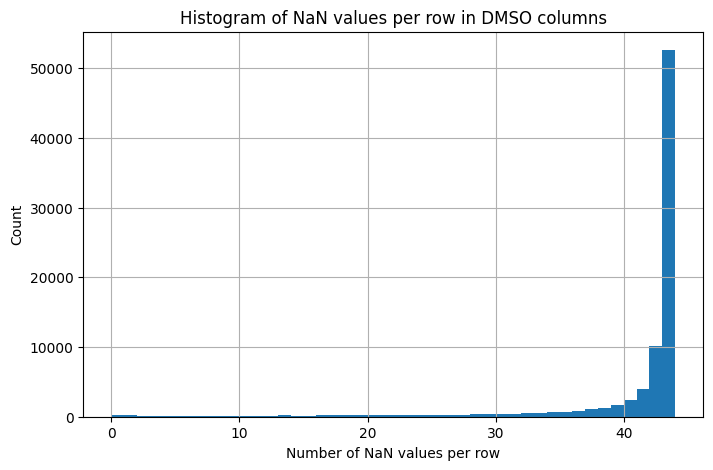

In [76]:
dmso_cols = [col for col in df.columns if "dmso" in col.lower()]
dmso_df = df[["Variant", "Unmod variant"] + dmso_cols].copy()
dmso_df["median"] = dmso_df[dmso_cols].median(axis=1, numeric_only=True)
dmso_df["n_nan"] = dmso_df[dmso_cols].isna().sum(axis=1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
dmso_df["n_nan"].hist(bins=range(dmso_df["n_nan"].min(), dmso_df["n_nan"].max() + 2))
plt.xlabel("Number of NaN values per row")
plt.ylabel("Count")
plt.title("Histogram of NaN values per row in DMSO columns")
plt.show()

In [77]:
import plotly.graph_objects as go
import numpy as np

# Filter rows with less than 13 NaNs
filtered = dmso_df[dmso_df["n_nan"] < 13]
if not filtered.empty:
    row = filtered.sample(1).iloc[0]
    dmso_vals = row[dmso_cols]
    variant_name = row["Variant"]
    median_val = row["median"]

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=dmso_cols,
        y=dmso_vals.values,
        name="DMSO Levels"
    ))
    fig.add_hline(y=median_val, line_color="red", line_dash="dash", annotation_text="Median", annotation_position="top right")
    fig.update_layout(
        title=f"DMSO Levels for Variant: {variant_name}",
        xaxis_title="DMSO Columns",
        yaxis_title="Intensity",
        showlegend=False,
        height=400
    )
    fig.show()

    print(f"Variant: {variant_name}")

Variant: .QAFPNTNR.


In [78]:
print(df.columns[:40])

Index(['rowid', 'ccms_row_id', 'Variant', 'Variant ID', 'Unmod variant',
       'Total', 'Total- Unmodified sequence', 'Variants- Unmodified sequence',
       'Proteins', 'Mass', 'Charge', 'Num Mods', 'All Mods', 'Is Decoy',
       'Lorikeet input', 'Orig cluster FDR', 'Pep Prefix', 'Variant FDR',
       'Peptidoform', 'Canonical proteins', 'Top protein',
       'Top canonical protein', 'Top protein FDR', 'Top canonical protein FDR',
       'Rep cluster task', 'Rep cluster user', 'Rep cluster index',
       'Num tasks', 'Outlier groups', 'Outlier group ratio',
       'Outlier groups- unmod', 'Outlier group ratio- unmod', 'Unmod_Variant',
       'aew541_1000nm', 'aew541_100nm', 'aew541_10nm', 'aew541_30000nm',
       'aew541_3000nm', 'aew541_300nm', 'aew541_30nm'],
      dtype='object')


In [79]:
from collections import defaultdict

def analyze_nan_values(df):
    # Initialize the output dictionary with defaultdict, default value is 0
    output = defaultdict(int)

    # Extract unique drug names from the column names
    drug_columns = [col for col in df.columns if re.match(r'.+_\d+nm$', col)]
    drugs = set(col.split('_')[0] for col in drug_columns)
    print("Drugs are : ", drugs)

    # Iterate through each row in the DataFrame
    for i, row in enumerate(df.iterrows()):
        if i % 5000 == 0:
            print(f"Processing row {i}...")
        row_key = f"{row[1]['rowid']}_{row[1]['Variant']}"
        for drug in drugs:
            # Get all columns for the current drug
            drug_cols = [col for col in row[1].index if col.startswith(f"{drug}_")]
            # Check if all columns for the drug are NaN
            if all(pd.isna(row[1][col]) for col in drug_cols):
                output[row_key] += 1

    return dict(output)  # Convert defaultdict back to a regular dictionary if needed

In [80]:
# Example usage
result = analyze_nan_values(df)

Drugs are :  {'azd8186', 'azd1208', 'alvocidib', 'barasertib', 'alisertib', 'asp3026', 'amg208', 'byl719', 'aew541', 'azd8330', 'azd4547', 'azd6482', 'azd5438', 'bafetib', 'amg900', 'at7519', 'axl1717', 'arry380', 'apatib', 'barasertibhqpa', 'abemaciclib', 'bi2536', 'bms911543', 'azd2014', 'azd7762', 'azd5363', 'at9283', 'alectib', 'bms690514', 'bgt226', 'axitib', 'apitolisib', 'bms754807', 'bi847325', 'at13148', 'bms387032', 'afatib', 'baricitib', 'azd8055', 'amuvatib', 'bms777607', 'azd1480', 'av412'}
Processing row 0...
Processing row 5000...
Processing row 10000...
Processing row 15000...
Processing row 20000...
Processing row 25000...
Processing row 30000...
Processing row 35000...
Processing row 40000...
Processing row 45000...
Processing row 50000...
Processing row 55000...
Processing row 60000...
Processing row 65000...
Processing row 70000...
Processing row 75000...
Processing row 80000...


In [81]:
result

{'1_.IITHPNFNGNTLDNDIM+15.995LIK.': 43,
 '8_.DVYIVQDLM+15.995ETDLYK.': 43,
 '11_.IFTSIGEDYDER.': 1,
 '12_.PM+15.995FIVNTNVPR.': 43,
 '15_.IITHPNFNGNTLDNDIMLIK.': 2,
 '16_.LHFFM+15.995PGFAPLTSR.': 43,
 '20_.LKELIFEETAR.': 3,
 '25_.VTEQLIEAINNGDFEAYTK.': 1,
 '26_.M+15.995LTFNPHK.': 43,
 '28_.+42.011LKELIFEETAR.': 43,
 '29_.APTIEQMKDVYIVQDLM+15.995ETDLYK.': 43,
 '31_.ELIFEETAR.': 6,
 '32_.FSLDVC+57.021EAM+15.995EYLEGNNFVHR.': 43,
 '33_.KTDFEVFDALM+15.995VDSQK.': 43,
 '34_.LADFGLAR.': 1,
 '35_.L+28.003GEHNIDVLEGNEQFINAAK.': 43,
 '36_.GQVLNSDELQELYEGLR.': 3,
 '37_.APEIM+15.995LNSK.': 43,
 '38_.LQPHEFQGGTFTISNLGM+15.995FGIK.': 43,
 '40_.GLSEDTTEETLKESFDGSVR.': 1,
 '41_.VM+15.995EGTVAAQDEFYR.': 43,
 '42_.SLEEFNDVYLVTHLM+15.995GADLNNIVK.': 43,
 '43_.FGLALAVAGGVVNSALYNVDAGHR.': 1,
 '45_.ISEQFTAM+15.995FR.': 43,
 '46_.VRLDDDDEGVPSSALR.': 8,
 '48_.LLYPPETGLFLVR.': 2,
 '49_.THINIVVIGHVDSGK.': 3,
 '50_.LAVNM+15.995VPFPR.': 43,
 '52_.GAILTTM+15.995LATR.': 43,
 '53_.IYLTADNLVLNLQDESFTR.': 1,
 '54_.TT

In [82]:
import copy
nanAnalysisWithOnlyVariants = copy.deepcopy(result)

In [83]:
def analyze_nan_values_with_protein(df):
    # Initialize the output dictionary with defaultdict, default value is 0
    output = defaultdict(int)

    # Extract unique drug names from the column names
    drug_columns = [col for col in df.columns if re.match(r'.+_\d+nm$', col)]
    drugs = set(col.split('_')[0] for col in drug_columns)
    print("Drugs are : ", drugs)

    # Iterate through each row in the DataFrame
    for i, row in enumerate(df.iterrows()):
        if i % 5000 == 0:
            print(f"Processing row {i}...")
        row_key = f"{row[1]['rowid']}_{row[1]['Variant']}_{row[1]['Proteins']}"
        for drug in drugs:
            # Get all columns for the current drug
            drug_cols = [col for col in row[1].index if col.startswith(f"{drug}_")]
            # Check if all columns for the drug are NaN
            if all(pd.isna(row[1][col]) for col in drug_cols):
                output[row_key] += 1

    return dict(output)

In [84]:
nanAnalysisWithVariantsAndProteins = analyze_nan_values_with_protein(df)

Drugs are :  {'azd8186', 'azd1208', 'alvocidib', 'barasertib', 'alisertib', 'asp3026', 'amg208', 'byl719', 'aew541', 'azd8330', 'azd4547', 'azd6482', 'azd5438', 'bafetib', 'amg900', 'at7519', 'axl1717', 'arry380', 'apatib', 'barasertibhqpa', 'abemaciclib', 'bi2536', 'bms911543', 'azd2014', 'azd7762', 'azd5363', 'at9283', 'alectib', 'bms690514', 'bgt226', 'axitib', 'apitolisib', 'bms754807', 'bi847325', 'at13148', 'bms387032', 'afatib', 'baricitib', 'azd8055', 'amuvatib', 'bms777607', 'azd1480', 'av412'}
Processing row 0...
Processing row 5000...
Processing row 10000...
Processing row 15000...
Processing row 20000...
Processing row 25000...
Processing row 30000...
Processing row 35000...
Processing row 40000...
Processing row 45000...
Processing row 50000...
Processing row 55000...
Processing row 60000...
Processing row 65000...
Processing row 70000...
Processing row 75000...
Processing row 80000...


In [85]:
nanAnalysisWithVariantsAndProteins

{'1_.IITHPNFNGNTLDNDIM+15.995LIK._TRYP_PIG': 43,
 '8_.DVYIVQDLM+15.995ETDLYK._sp|P27361-2|MK03_HUMAN;sp|P27361-3|MK03_HUMAN;sp|P27361|MK03_HUMAN;sp|P28482-2|MK01_HUMAN;sp|P28482|MK01_HUMAN;tr|B3KR49|B3KR49_HUMAN;tr|E9PBK7|E9PBK7_HUMAN;tr|E9PJF0|E9PJF0_HUMAN;tr|E9PQW4|E9PQW4_HUMAN;tr|H0YDH9|H0YDH9_HUMAN': 43,
 '11_.IFTSIGEDYDER._sp|P35232-2|PHB_HUMAN;sp|P35232|PHB_HUMAN;tr|C9JW96|C9JW96_HUMAN;tr|C9JZ20|C9JZ20_HUMAN;tr|D6RBK0|D6RBK0_HUMAN;tr|E7ESE2|E7ESE2_HUMAN;tr|E9PCW0|E9PCW0_HUMAN': 1,
 '12_.PM+15.995FIVNTNVPR._sp|P14174|MIF_HUMAN': 43,
 '15_.IITHPNFNGNTLDNDIMLIK._TRYP_PIG': 2,
 '16_.LHFFM+15.995PGFAPLTSR._sp|A6NNZ2|TBB8B_HUMAN;sp|P04350|TBB4A_HUMAN;sp|P07437|TBB5_HUMAN;sp|P68371|TBB4B_HUMAN;sp|Q13885|TBB2A_HUMAN;sp|Q3ZCM7|TBB8_HUMAN;sp|Q9BUF5|TBB6_HUMAN;sp|Q9BVA1|TBB2B_HUMAN;tr|A0A075B736|A0A075B736_HUMAN;tr|K7ESM5|K7ESM5_HUMAN [further mapped to 3 additional proteins]': 43,
 '20_.LKELIFEETAR._sp|P28482-2|MK01_HUMAN;sp|P28482|MK01_HUMAN': 3,
 '25_.VTEQLIEAINNGDFEAYTK._sp|Q13557-10|KC

In [86]:
len(nanAnalysisWithVariantsAndProteins.keys()), len(nanAnalysisWithOnlyVariants.keys())

(82970, 82970)

In [87]:
numrows = 0
for i in nanAnalysisWithOnlyVariants.keys():
    if nanAnalysisWithOnlyVariants[i] == 43:
        numrows += 1

print(numrows)

39307


In [88]:
df.iloc[0]

rowid                                          1
ccms_row_id                                    1
Variant            .IITHPNFNGNTLDNDIM+15.995LIK.
Variant ID                                 37658
Unmod variant             .IITHPNFNGNTLDNDIMLIK.
                               ...              
baricitib_300nm                             <NA>
baricitib_30nm                              <NA>
baricitib_3nm                               <NA>
baricitib_dmso                              <NA>
baricitib_pdpd                              <NA>
Name: 0, Length: 463, dtype: object

In [89]:
print(df.iloc[0].to_dict())

{'rowid': 1, 'ccms_row_id': 1, 'Variant': '.IITHPNFNGNTLDNDIM+15.995LIK.', 'Variant ID': 37658, 'Unmod variant': '.IITHPNFNGNTLDNDIMLIK.', 'Total': 11683, 'Total- Unmodified sequence': 20735, 'Variants- Unmodified sequence': 81, 'Proteins': 'TRYP_PIG', 'Mass': 2299.2, 'Charge': 2, 'Num Mods': 1, 'All Mods': ',16,', 'Is Decoy': False, 'Lorikeet input': 'IITHPNFNGNTLDNDIM+15.995LIK', 'Orig cluster FDR': 0.0, 'Pep Prefix': 'II', 'Variant FDR': 0.0, 'Peptidoform': nan, 'Canonical proteins': 'TRYP_PIG', 'Top protein': 'TRYP_PIG', 'Top canonical protein': 'TRYP_PIG', 'Top protein FDR': 0.0, 'Top canonical protein FDR': 0.0, 'Rep cluster task': '10a668b61ca64fad88633cfee971ab9a', 'Rep cluster user': 'batch', 'Rep cluster index': 86795, 'Num tasks': 49, 'Outlier groups': '.BYL-719-PDPD.Tech-replicate-1-of-1.', 'Outlier group ratio': 0.09, 'Outlier groups- unmod': '.BYL-719-PDPD.Tech-replicate-1-of-1.', 'Outlier group ratio- unmod': 0.1, 'Unmod_Variant': nan, 'aew541_1000nm': None, 'aew541_100n

In [90]:
def analyze_nan_values_control(df):
    # Initialize the output dictionary with defaultdict, default value is 0
    output = defaultdict(int)

    # Extract unique drug names from the column names
    drug_columns = [col for col in df.columns if re.match(r'.+_dmso$', col)]
    drugs = set(col.split('_')[0] for col in drug_columns)

    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        row_key = f"{row['rowid']}_{row['Variant']}"
        for drug in drugs:
            # Get only the control columns for the current drug (ending with _dmso)
            drug_cols = [col for col in row.index if col == f"{drug}_dmso"]
            # Check if the control column for the drug is NaN
            if all(pd.isna(row[col]) for col in drug_cols):
                output[row_key] += 1

    return dict(output)

In [91]:
nanAnalysisOnControl = analyze_nan_values_control(df)

In [92]:
numDMSORows = 0
variantList = []
for i in nanAnalysisOnControl.keys():
    if nanAnalysisOnControl[i] <= 23:
        variantList.append(i)
        numDMSORows += 1

print(numDMSORows)

4168


In [93]:
unique_unmod_variants = df['Unmod variant'].nunique()
print(f"Number of unique values in 'Unmod variant': {unique_unmod_variants}")

Number of unique values in 'Unmod variant': 58391


In [94]:
variantList

['5_.ESESTAGSFSLSVR.',
 '7_.IQDKEGIPPDQQR.',
 '11_.IFTSIGEDYDER.',
 '14_.TAVC+57.021DIPPR.',
 '15_.IITHPNFNGNTLDNDIMLIK.',
 '17_.FTDDYQLFEELGK.',
 '20_.LKELIFEETAR.',
 '21_.YSIPPHDTQYTVFHSLIR.',
 '25_.VTEQLIEAINNGDFEAYTK.',
 '27_.GHYTEGAELVDSVLDVVRK.',
 '31_.ELIFEETAR.',
 '34_.LADFGLAR.',
 '36_.GQVLNSDELQELYEGLR.',
 '40_.GLSEDTTEETLKESFDGSVR.',
 '43_.FGLALAVAGGVVNSALYNVDAGHR.',
 '44_.VATVSLPR.',
 '46_.VRLDDDDEGVPSSALR.',
 '48_.LLYPPETGLFLVR.',
 '49_.THINIVVIGHVDSGK.',
 '53_.IYLTADNLVLNLQDESFTR.',
 '55_.FYFENALSK.',
 '58_.INLEAAELGEISDIHTK.',
 '59_.SIDDEITEAK.',
 '60_.TGPFEDLKENLIR.',
 '62_.FQTKDPEEQGDIVVALYPYDGIHPDDLSFK.',
 '65_.AKDFSLILDDVAITELSFSR.',
 '66_.DIKPQNLLLDPDTAVLK.',
 '69_.ESTESSNTTIEDEDVKAR.',
 '70_.HSNLVQLLGVIVEEK.',
 '72_.VPFLPGDSDLDQLTR.',
 '73_.HTLDELNPQK.',
 '74_.ILGADTSVDLEETGR.',
 '78_.LSPLEAC+57.021AHSFFDELR.',
 '79_.SEPPTLAQPSR.',
 '80_.AANILVSDTLSC+57.021K.',
 '81_.FFEILSPVYR.',
 '84_.SIYGEKFEDENFILK.',
 '88_.LLLGAGAVAYGVR.',
 '89_.ALFPGDSEIDQLFR.',
 '97_.AGNILFT

In [95]:
# Filter the dataframe to include only rows where the 'Variant' column matches an entry in variantList
filtered_df = df[df['Variant'].isin([entry.split('_')[1] for entry in variantList])]

# Display the new dataframe
filtered_df.head()

rowid  ccms_row_id                 Variant  Variant ID  \
4       5            5        .ESESTAGSFSLSVR.       21292   
6       7            7         .IQDKEGIPPDQQR.       39596   
10     11           11          .IFTSIGEDYDER.       36599   
13     14           14      .TAVC+57.021DIPPR.       87369   
14     15           15  .IITHPNFNGNTLDNDIMLIK.       37659   

             Unmod variant  Total  Total- Unmodified sequence  \
4         .ESESTAGSFSLSVR.   7995                        8328   
6          .IQDKEGIPPDQQR.   6836                        6882   
10          .IFTSIGEDYDER.   5284                        5412   
13             .TAVCDIPPR.   4837                        4837   
14  .IITHPNFNGNTLDNDIMLIK.   4830                       20735   

    Variants- Unmodified sequence  \
4                               7   
6                               7   
10                              7   
13                              1   
14                             81   

                                             Proteins    Mass  ...  \
4   sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...  1456.7  ...   
6   sp|P0CG47|UBB_HUMAN;sp|P0CG48|UBC_HUMAN;sp|P62...  1523.8  ...   
10  sp|P35232-2|PHB_HUMAN;sp|P35232|PHB_HUMAN;tr|C...  1444.6  ...   
13  sp|A6NNZ2|TBB8B_HUMAN;sp|P04350|TBB4A_HUMAN;sp...  1085.5  ...   
14                                           TRYP_PIG  2283.2  ...   

    baricitib_1000nm  baricitib_100nm baricitib_10nm  baricitib_30000nm  \
4           11120000         15061000       18264000           13380000   
6            1740400          9648200       16877000            2505000   
10          31864000        123890000      130640000           46563000   
13           1097300          2733200        6343300             987920   
14              <NA>             <NA>           <NA>               <NA>   

   baricitib_3000nm  baricitib_300nm baricitib_30nm  baricitib_3nm  \
4          14280000         19220000       11216000       12721000   
6           3093800          4726100        7930900        8424800   
10         37421000         54811000       96800000       78860000   
13          1095500          2920500        4860600        7768400   
14             <NA>             <NA>           <NA>           <NA>   

    baricitib_dmso baricitib_pdpd  
4         12835000        8137600  
6         11643000        5830600  
10        75034000       70372000  
13         2558000        3113400  
14            <NA>           <NA>  

[5 rows x 463 columns]

In [96]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4168 entries, 4 to 14674
Columns: 463 entries, rowid to baricitib_pdpd
dtypes: Int64(430), bool(1), float64(8), int64(10), object(14)
memory usage: 16.4+ MB


In [97]:
# Write the filtered_df dataframe to a CSV file
filtered_df.to_csv('filtered_data.csv', index=False)

In [98]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4168 entries, 4 to 14674
Columns: 463 entries, rowid to baricitib_pdpd
dtypes: Int64(430), bool(1), float64(8), int64(10), object(14)
memory usage: 16.4+ MB


In [109]:
def analyze_peptides(df):
    # 1. Total number of unique peptides
    total_unique_peptides = df['Variant'].nunique()

    # 2. Total number of unmodified peptides
    total_unmodified_peptides = df['Unmod variant'].nunique()

    # 3. Total number of rows with only one unique protein
    single_protein_rows = df['Proteins'].apply(lambda x: len(x.split(';')) <= 2).sum()
    # Filter rows with only one unique protein
    single_protein_rows_df = df[df['Proteins'].apply(lambda x: len(x.split(';')) <= 2)]
    total_unique_single_protein_rows = single_protein_rows_df['Proteins'].unique()

    # Display 5 rows
    # print("single proteins : ", total_unique_single_protein_rows)
    print("Number of unique proteins that have one protein per row", len(total_unique_single_protein_rows))

    return total_unique_peptides, total_unmodified_peptides, single_protein_rows

# Example usage
total_unique_peptides, total_unmodified_peptides, single_protein_rows = analyze_peptides(df)
print(f"Total unique peptides: {total_unique_peptides}")
print(f"Total unmodified peptides: {total_unmodified_peptides}")
print(f"Rows with only one unique protein: {single_protein_rows}")

Number of unique proteins that have one protein per row 4716
Total unique peptides: 83706
Total unmodified peptides: 58391
Rows with only one unique protein: 34580


In [110]:
total_unique_peptides, total_unmodified_peptides, single_protein_rows = analyze_peptides(filtered_df)
print(f"Total unique peptides: {total_unique_peptides}")
print(f"Total unmodified peptides: {total_unmodified_peptides}")
print(f"Rows with only one unique protein: {single_protein_rows}")

Number of unique proteins that have one protein per row 565
Total unique peptides: 4168
Total unmodified peptides: 4162
Rows with only one unique protein: 1644
